# SimpleRNN on SineWave

The goal of this project is to implement a simple Recurrent Neural Network (RNN) model to predict the values of a sine wave. The RNN will be trained on a sequence of sine wave data points and learn to predict the next value in the sequence.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Making DataFrame

In [3]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [4]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

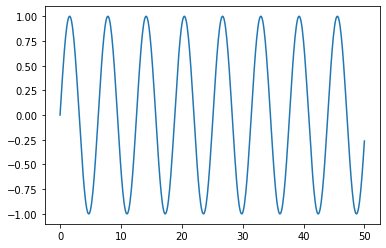

In [6]:
plt.plot(x, y)

In [7]:
dataframe = pd.DataFrame(data = y, index = x, columns = ['Sine'])

In [8]:
dataframe.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [9]:
dataframe.tail()

,Sine
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400
50.0,-0.262375


In [10]:
test_percent = 0.1

In [12]:
test_point = np.round(len(dataframe)*test_percent)

In [13]:
test_index = int(len(dataframe) - test_point)

In [14]:
test_index

451

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

In [15]:
train = dataframe.iloc[:test_index]
test = dataframe.iloc[test_index:]

# Scaling

Scaling is a common preprocessing step in data analysis and machine learning. It involves transforming the features of a dataset to a standard scale, which can help improve the performance and stability of models

MinMaxScaler is a popular scaling technique used in data preprocessing. It scales the features to a specified range, typically between 0 and 1. 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [21]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


# Timeseries Generator

In time series analysis, a common approach is to use a time series generator to generate batches of sequential data for training recurrent neural networks (RNNs) or other time-based models. This allows you to efficiently process and train models on large time series datasets. Here's an example of how you can create a time series generator using the TimeseriesGenerator calss.

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 50 
batch_size = 1 
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [26]:
n_features = 1

In [27]:
model = Sequential()
model.add(SimpleRNN(50, input_shape =(length, n_features)))
model.add(Dense(1))

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [29]:
model.compile(optimizer = 'adam', loss = 'mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


# Training The Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [31]:
model.fit_generator(generator, epochs = 10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2336\3297226058.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 10)


Epoch 1/10
401/401 [==============================] - 19s 30ms/step - loss: 0.0053
Epoch 2/10
401/401 [==============================] - 13s 33ms/step - loss: 1.1053e-04
Epoch 3/10
401/401 [==============================] - 11s 27ms/step - loss: 1.4710e-04
Epoch 4/10
401/401 [==============================] - 9s 23ms/step - loss: 2.2643e-04
Epoch 5/10
401/401 [==============================] - 9s 23ms/step - loss: 2.3892e-04
Epoch 6/10
401/401 [==============================] - 9s 22ms/step - loss: 2.1591e-05
Epoch 7/10
401/401 [==============================] - 8s 20ms/step - loss: 2.6412e-05
Epoch 8/10
401/401 [==============================] - 7s 18ms/step - loss: 2.4016e-04
Epoch 9/10
401/401 [==============================] - 8s 19ms/step - loss: 1.3619e-05
Epoch 10/10
401/401 [==============================] - 8s 20ms/step - loss: 4.6278e-05


In [34]:
model.save('model_simpleRNN.h5')

In [35]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

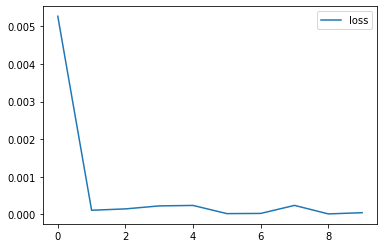

In [36]:
loss.plot()

# Predicting Values 

In [38]:
prediction = []
evaluation_batch = scaled_train[-length:]
current_batch = evaluation_batch.reshape(1, length, n_features)
for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    prediction.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis = 1)

1/1 [==============================] - 0s 60ms/step


In [39]:
prediction

[array([0.95010334], dtype=float32),
 array([0.9698218], dtype=float32),
 array([0.98515165], dtype=float32),
 array([0.995809], dtype=float32),
 array([1.0017418], dtype=float32),
 array([1.002833], dtype=float32),
 array([0.99924654], dtype=float32),
 array([0.99109775], dtype=float32),
 array([0.9783467], dtype=float32),
 array([0.9612743], dtype=float32),
 array([0.94009846], dtype=float32),
 array([0.914953], dtype=float32),
 array([0.88616925], dtype=float32),
 array([0.85393786], dtype=float32),
 array([0.8186407], dtype=float32),
 array([0.78049284], dtype=float32),
 array([0.73996085], dtype=float32),
 array([0.69726783], dtype=float32),
 array([0.6527986], dtype=float32),
 array([0.6069862], dtype=float32),
 array([0.5601991], dtype=float32),
 array([0.5128526], dtype=float32),
 array([0.46549538], dtype=float32),
 array([0.41855025], dtype=float32),
 array([0.37252665], dtype=float32),
 array([0.3279713], dtype=float32),
 array([0.28544736], dtype=float32),
 array([0.2454651

In [40]:
prediction = scaler.inverse_transform(prediction)

In [41]:
prediction

array([[ 0.90020123],
       [ 0.93963785],
       [ 0.97029728],
       [ 0.99161185],
       [ 1.00347725],
       [ 1.00565971],
       [ 0.99848683],
       [ 0.98218938],
       [ 0.9566875 ],
       [ 0.92254302],
       [ 0.88019163],
       [ 0.82990109],
       [ 0.77233408],
       [ 0.70787182],
       [ 0.63727807],
       [ 0.56098295],
       [ 0.47991962],
       [ 0.39453426],
       [ 0.3055965 ],
       [ 0.2139725 ],
       [ 0.12039897],
       [ 0.02570678],
       [-0.06900692],
       [-0.16289642],
       [-0.25494289],
       [-0.34405285],
       [-0.42910007],
       [-0.50906392],
       [-0.58293979],
       [-0.64956247],
       [-0.70823869],
       [-0.75810339],
       [-0.79849031],
       [-0.82897356],
       [-0.84932265],
       [-0.85934601],
       [-0.85916185],
       [-0.84905054],
       [-0.82934775],
       [-0.80049545],
       [-0.76315192],
       [-0.71798141],
       [-0.66562302],
       [-0.60685248],
       [-0.54236101],
       [-0

In [42]:
test['Prediction'] = prediction

C:\Users\DELL\AppData\Local\Temp\ipykernel_2336\2031674796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = prediction


In [43]:
test

,Sine,Prediction
45.1,0.899097,0.900201
45.2,0.938307,0.939638
45.3,0.968142,0.970297
45.4,0.988304,0.991612
45.5,0.998591,1.003477
45.6,0.998900,1.005660
45.7,0.989229,0.998487
45.8,0.969673,0.982189
45.9,0.940429,0.956688
46.0,0.901788,0.922543


# Chart Showing Predicted Value And Actual Value

<AxesSubplot:>

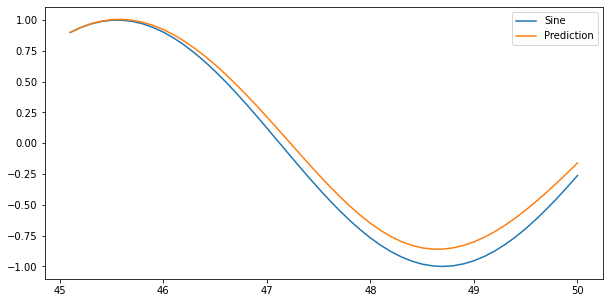

In [46]:
test.plot(figsize = (10, 5))